In [1]:
from IPython.display import Image
%matplotlib inline 

# CH1: Giving Computer the Ability to Learn from Data
Three types of machine learning
1. Unsupervised learning
    * Unlabelled data of unknown structure. Goal is to extract meaningful information.
    * Clustering is a type of analysis that tries to group data into subgroups (clusters) based on similarity. Unsupervised classification.
    * Dimensionality reduction used to remove noise from data and compress into a lower dimensional subspace while retaining as much information as possible.
2. Supervised learning
    * Learn from labeled data to make predictions about unseen future data
    * If labels are discrete task is classification, if labels are continuous task is a regression.
    * Decision boundary separates classes in parameter space
3. Reinforcement learning
    * Goal is to develop a system(agent) that improves its performance based on interactions with the environment. Environment also includes a reward signal making this a type of supervised learning (even though there are no ground-truth labels). Agent takes actions to maximize reward signal 

Typical machine learning roadmap
1. Preprocessing
    * Wrangling data into a usefull form. 
    * Feature extraction and scaling
    * Dimensionality reduction techniques
    * Randomly divide data into training and test sets
2. Training
    * Training classification models
    * Hyperparameter optimization techniques to adjust parameters of model
3. Evaluation
    * Need a performance measure, accuracy is often used
    * Cross-validation techniques to help determine how well a model generalizes to new data
4. Prediction
    * Model can now be used to label unknown data

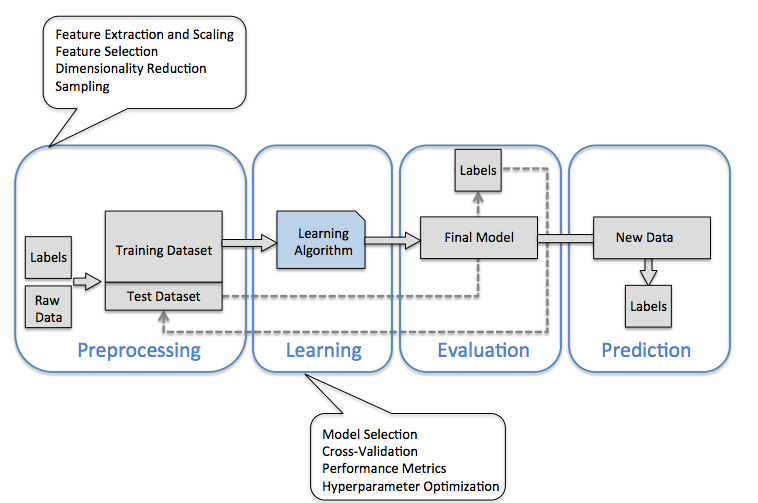

In [2]:
Image('ml_roadmap.png')

# CH2: Training Machine Learning Algorithms for Classification
## Perceptron
Perceptron learning rule based on neutron model
* Binary classification problem. Define activation function ($\phi(z)$) that takes a linear combination of input values ($\mathbf{x}$) and corresponding weights ($\mathbf{w}$). If output is above a threshold it is classified as the positive class and in the negative class if below 
Perceptron activation function is a unit step function (Heaviside step function). 
$$\phi(z) = \left\{\begin{array}{ll} 1\:if\:z \geq \theta \\-1\:otherwise \end{array}\right.$$
For simplicity we can move threshold to the left side of the equation by setting $w_0=-\theta$ and $x_0=1$. This gives:
$$\phi(z) = \left\{\begin{array}{ll} 1\:if\:z \geq 0 \\-1\:otherwise \end{array}\right.$$
Perceptron training steps can be summarized by:
1. Initialize weights to 0 or small random numbers
2. For each training sample $\mathbf{x}^{(i)}$ perform the following steps:
    1. Compute the output value $\hat{y}$
    2. Update the weights
Output value is the class label predicted by the unit step function defined earlier. Update of the weights can be written as:
$$w_j := w_j + \Delta w_j$$
The value of $\Delta w_j$ is calculated using the perceptron learning rule
$$\Delta w_j = \eta(y^{(i)} - \hat{y}^{(i)})x_j^{(i)}$$
Convergence of perceptron is only guaranteed if the two classes are linearly separable and the learning rate is sufficiently small. Otherwise a maximumber number of pass over the training set is needed.

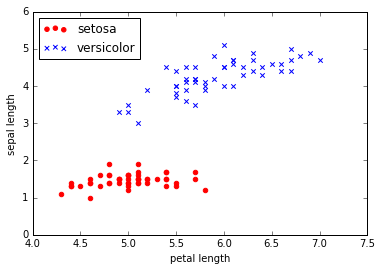

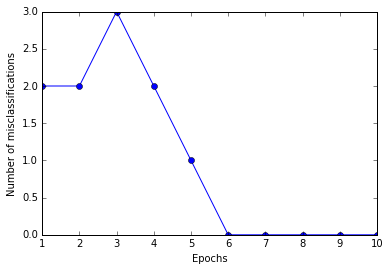

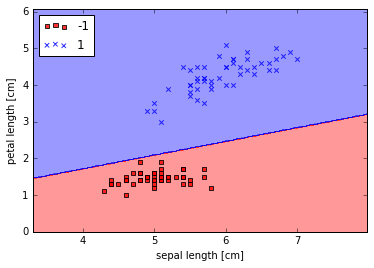

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class Perceptron(object):
    """Perceptron classifier

    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx),
            marker=markers[idx], label=cl)

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1],
    color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
    color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, 
    marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Adaptive Linear Neuron (Adaline)
Perceptron used the binary output as the error signal. The Adaline rule differes by using the linear activation as the error signal ($\mathbf{w}^T\mathbf{x}$). The output of the linear activation is passed through a quantizer to predict the actual class labels. This feeds a continuous value as the error signal instead of the discrete value of the perceptron.

A cost function is created to create an optimization problem. Adaline uses a Sum of Squared Errors cost as below:
$$ J(\mathbf{w}) = \frac{1}{2}\sum_i\left(y^{(i)} - \phi(z^{(i)}))^2 \right)$$
Main advantage by using a continous linear activation is that the cost function is now differentiable. The cost function here is also convex allowing us to use gradient descent to search for the minimum. We can step towards global or local minima by updating the weights in a downward step:
$$\Delta \mathbf{w} = -\eta \nabla J(\mathbf{w})$$
To compute gradient of cost functions we need to calculate its partial derivatives with respect to each weight.
$$\Delta w_j = -\eta \frac{\delta J}{\delta w_j} = \eta \sum_i \left(y^{(i)}-\phi(z^{(i)})\right)x_j^{(i)}$$

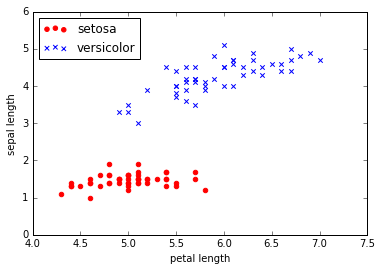

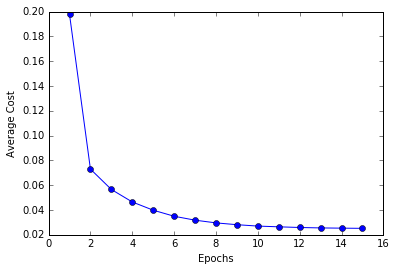

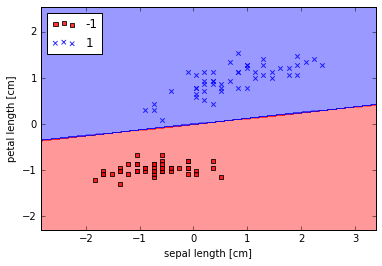

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from numpy.random import seed

class AdalineGD(object):
    '''ADAptive LInear NEUron classifier

    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch
        if True to prevent cycles.
    random_state : int (default: None)
        Set random state for shuffling
        and initializing the weights.

    '''
    def __init__(self, eta=0.01, n_iter=10,
                shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)

    def fit(self, X, y):
        '''Fit training data

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        '''
        self._initialize_weights(X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        '''Fit training data without reinitializing the weights'''
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        '''Shuffle training data'''
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        '''Initialize weights to zero'''
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        '''Apply Adaline learning rule to update the weights'''
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        '''Calculate net input'''
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        '''Compute linear activation'''
        return self.net_input(X)

    def predict(self, X):
        '''Return class label after unit step'''
        return np.where(self.activation(X) >= 0.0, 1, -1)
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=cmap(idx),
            marker=markers[idx], label=cl)

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
    'machine-learning-databases/iris/iris.data', header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1],
    color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
    color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

# standardization
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ppn = AdalineGD(eta=0.01, n_iter=15)
ppn.fit(X_std, y)
plt.plot(range(1, len(ppn.cost_) + 1), ppn.cost_, 
    marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

plot_decision_regions(X_std, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Need to be careful to choose a learning rate that is not too large, otherwise the steps will be too large and overshoot the minimum. This can create an unstable system and cause the error to increase after each step.

Many algorithms require feature scaling for optimal performance. One method is standardization which gives our data the property of a normal distribution, centering the mean at 0 and the standard deviation at 1.
$$ \mathbf{x'}_j = \frac{\mathbf{x}_j - \mu_j}{\sigma_j}$$
Previously we have minimized the cost function by taking a step in the opposite direction of a gradient that is calculated from the whole training set. This is known as batch gradient descent. With larger datasets this can be computationally expensive. We can instead use stochastic gradient descent which updates the weights incrementally for each training sample:
$$\Delta \mathbf{w} = \eta\left(y^{(i)} - \phi(z^{(i)})\right)\mathbf{x}^{(i)}$$
You can see that the sum has been removed in the stochastic version. Although this is an approximation of batch gradient descent it can often converge faster because of its more frequent weight updates. This also creates a noisier error surface which can help for escaping local minima. Data needs to be presented in random order for stochastic gradient descent.

# CH3: A Tour of Machine Learning Classifiers Using Scikit-learn
Choosing an appropriate classification alogirithm requires practice: each algorithm has its own quirks and is based on certain assumptions. 'No Free Lunch' theorem: no single classifier works best across all possible scenarios. Best to compare a handful of different learning algorithms to select the best model for the particular problem. 

Five main steps in training a machine learning algorithm:
1. Selection of features
2. Choosing a performance metric
3. Choosing a classifier and optimization algorithm
4. Evaluating the performance of the model
5. Tuning the algorithm

## Training perceptron via scikit-learn
Use iris dataset and only two features for easier visualization.

In [5]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

Split data into separate training and test datasets.

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Many algorithms require feature scaling such as gradient descent. Here we will use scikit-learn's preprocessing module. The test set is scaled using the same parameters found for the training set.

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Multiclass classification is handled using the One-vs.-Rest method. Most scikit-learn algorithms handle multiclass classification by default.

In [8]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

This interface is very similiar to the Perceptron class we built earlier. Reminder that the learning rate needs to be choosen so that the learning is fast, yet not too fast such that it overshoots the minimum. We can now use the trained model for prediction.

In [9]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


Scikit-learn has a large variety of different performance metrics available. Note that the accuracy is found using the test data set.

In [10]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


We can now plot the decision regions of our trained perceptron.

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c='', alpha=1.0, linewidths=1, marker='o', s=55, label='test set')

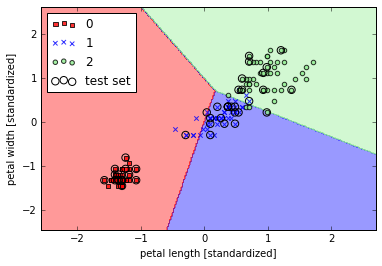

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

The perceptron cannot handle data that is not linearly separable. In this case, since there will always be at least one sample that is misclassified, it will keep trying to make corrections.

## Logistic Regression
Now we move onto a model that will converge even if the classes are not perfectly linearly separable. Logistic regression is a model for binary classification that can be extended to multiclass classification using the OvR technique.

The odds ratio is the odds in favor of a particular event,

$$\frac{p}{1-p}$$

where $p$ is the odds in favour of a positive event. We can then define the logit function as the logarithm of the odds ratio,

$$logit(p) = log\frac{p}{1-p}$$

The logit function takes input values in the range of 0 to 1 and transforms them to values over the entire real number range, which we can use to express a linear relationship between feature values and the log-odds:

$$logit(p(y = 1\,\vert\,\mathbf{x})) = \sum^m_{i=0} w_ix_i = \mathbf{W}^T\mathbf{x}$$

Here $p(y = 1\,\vert\,\mathbf{x})$ is the conditional probability that a particular sample belongs to class 1 given its features $x$.

Now what we are actually interested in is predicting the probabiity that a certain sample belongs to a particular class, which is the inverse form of the logit function. It is called the logistic or sigmoid function.

$$\phi(x)=\frac{1}{1+e^{-z}}$$

where $z$ is the net input, that is, the linear combination of weights and sample features ($\mathbf{w}^T\mathbf{x}$). The sigmoid function takes real number values as input and transforms them to values in the range [0,1] with an intercept at 0.5.

This is similar to the Adaline implementation except we have replaced the activation function of $\phi(z)=z$ with the sigmoid function. The output of the logistic function is the probability that a sample belongs to a particular class. This outcome can be converted to a binary outcome via a quantizer (unit step function).

$$\hat{y} = \left\{\begin{array}{ll} 1\:if\:\phi(z) \geq 0.5 \\0\:otherwise \end{array}\right.$$

which translates into,

$$\hat{y} = \left\{\begin{array}{ll} 1\:if\:z \geq 0.0 \\0\:otherwise \end{array}\right.$$

To derive the cost function for logistic regression let's first define the likelihood $L$ that we want to maximize.

$$L(\mathbf{w})=P(\mathbf{y}\:|\:\mathbf{x};\mathbf{w})=\prod^n_{i=1}P(y^{(i)}\:|\:x^{(i)};\mathbf{w})
=\prod^n_{i=1}(\phi(z^{(i)}))^{y^{(i)}}(1-\phi(z^{(i)}))^{1-y^{(i)}}$$

For positive cases, $y^{(i)}=1$ and the left side of the product is used. For negative cases, $y^{(i)}=0$ and the right side of the product is used. In practice, it is easier to maximize the log of this function.

$$l(\mathbf{w}) = logL(\mathbf{w})=\sum^n_{i=1}y^{(i)}log(\phi(z^{(i)}))+(1-y^{(i)})log(1-\phi(z^{(i)}))$$

By using the log this reduces the potential for numerical underflow which can occur if the likelihoods are very small. Also, it converts the product of factors to a summation, which is much easier to differentiate. Using this log-likelihood function we can then produce a cost function as follows.

$$J(\mathbf{w}) = \sum^n_{i=1}-y^{(i)}log(\phi(z^{(i)}))-(1-y^{(i)})log(1-\phi(z^{(i)}))$$

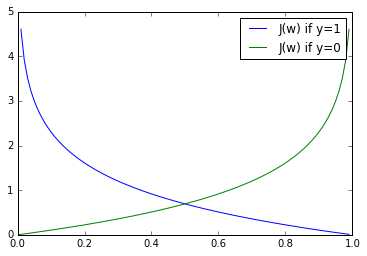

In [13]:
phi_z=np.arange(0, 1.0, .01)
plt.plot(phi_z, -np.log(phi_z), phi_z, -np.log(1 - phi_z))
plt.legend(['J(w) if y=1', 'J(w) if y=0'])
plt.show()

We can see that the cost approaches 0 if the prediction is correct, and increases towards infinity if the prediction is incorrect. We could now implement logistic regression by replacing our cost function in our Adaline implementation with the cost function above. However, we will use the built-in skikit-learn implementation.

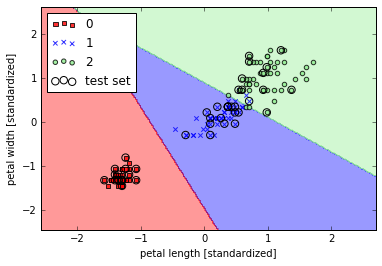

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

We update the weights using the gradient descent rule:

$$ \mathbf{w} := \mathbf{w} + \Delta\mathbf{w}, \Delta\mathbf{w} = -\eta\nabla J(\mathbf{w})$$

This is equal to the gradient descent rule in Adaline.

## Tackling Overfitting via Regularization
Overfitting is a common problem in machine learning, where a model performs well on training data but fails to generalize well to unseen data. An overfitted model is also said to have high variance which can be caused by having too many parameters that lead to a model that is too complex for the underlying data.

The opposite, underfitting, can occur when a model is too simple to capture patterns in the training data and will suffer from low performance on both the training and test data.

Regularization counteracts overfitting by adding a penalty for extreme parameter weights. L2 regularization is shown below:

$$ \frac{\lambda}{2}\|\mathbf{w}\|^2 = \frac{\lambda}{2}\sum_{j=1}^m w_j^2 $$

Where $\lambda$ is the regularization parameter. The parameter in scikit-learn is $C=1/\lambda$. Decreasing the value of $C$ increases the regularization strength. Adding this term gives:

$$J(\mathbf{w}) = C\left[\sum^n_{i=1}-y^{(i)}log(\phi(z^{(i)}))-(1-y^{(i)})log(1-\phi(z^{(i)}))\right] + \frac{1}{2}\|\mathbf{w}\|^2$$

## Maximum margin classification with support vector machines
SVMs can be considered an extension of the perceptron. In the perceptron we looked to minimize misclassification errors, in SVMs our objective is to maximize the margin. The margin is defined as the distance between the separating hyperplane (decision boundary) and the training samples that are closest to this hyperplane, which are called the support vectors. By maximizing the margin we produce a model that tends to be less prone to overfitting. An SVM tries to minimize $\frac{1}{2}\|\mathbf{w}\|^2$ under the constraints:

$$w_0 + \mathbf{w}^T\mathbf{x}^{(i)} \geq 1 \:if \:y^{(i)}=1$$
$$w_0 + \mathbf{w}^T\mathbf{x}^{(i)} < -1 \:if \:y^{(i)}=-1$$

The soft-margin classification uses a slack variable $\xi$. The motivation behind this approach was to relax the linear constraints for nonlinearly separable data to allow for convergence in the presence of misclassifications under the appropriate cost penalization. This changes the linear constraints as:

$$w_0 + \mathbf{w}^T\mathbf{x}^{(i)} \geq 1 - \xi^{(i)} \:if \:y^{(i)}=1$$
$$w_0 + \mathbf{w}^T\mathbf{x}^{(i)} < -1 + \xi^{(i)}\:if \:y^{(i)}=-1$$

The new objective to minimize is then:

$$\frac{1}{2}\|\mathbf{w}\|^2 + C \left(\sum_i\xi^{(i)}\right)$$

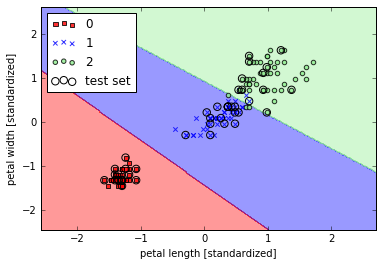

In [15]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In practical terms SVMs and logistic regression often yield similar results. Logistic regression tries to maximize the conditional likelihoods of the training data, which makes it more vulnerable to outliers than SVMs. Svms mostly care about the points that are closest to the decision boundary (support vectors). On the other hand, logistic regression is a simpler model that is easier to implement and can be easily updated, making it attractive for streaming data.

## Solving nonlinear problems using a kernel SVM
A reason for SVMs popularity is that they can be easily kernelized to solve nonlinear classification problems. We will use an XOR gate as a sample dataset.

In [16]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

The idea behind kernel methods is to deal with linearly inseparable data by using nonlinear combinations of the original features to project them onto a higher dimensional space via a mapping function $\phi(.)$ where it becomes linearly separable.

Although we didn't go into much deteail about how to solve the quadratic programming task to train the SVM, in practice all we need is to replace the dot product $\mathbf{x}^{(i)T}\mathbf{j}^{(j)}$ with a kernel function.  A common one is the Radial Basis Function kernel.

$$k(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = exp(-\gamma\|\mathbf{x}^{(i)}-\mathbf{x}^{(j)}\|^2)$$

A kernel function can be interpreted as a similarity function between a pair of samples.

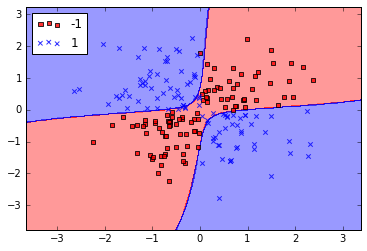

In [17]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

The parameter $\gamma$ can be understood as a cut-off parameter for the gaussian sphere. Increasing the value increases the sphere of influence, leading to a softer decision boundary.

## Decision tree learning
Decision tree classifiers are attractive if we care about interpretability. They involve breaking down the data by asking a series of questions. Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest information gain (IG). We then repeate the procedure at each child node until the leaves are pure. To avoid overfitting, we typically prune the tree by setting a limit for the maximal depth of the tree.

In order to split the nodes at the most informative features, we need to define an objective function that we want to optimize. Here, our objective function is to maximize the information gain at each split, which we define as:

$$IG(D_p,f) = I(D_p) - \sum_{j=1}^m\frac{N_j}{N_P}I(D_j)$$

Where $f$ is the feature to perform the split, $D_p$ an $D_j$ are the dataest of the parent and the jth child node, $I$ is our impurity measure, $N_p$ is the total number of samples at the parent node, and $N_j$ is the number of samples in the jth child node. The information gain is simply the difference between the impurity of the parent node and the sum of the impurities of the child nodes. For simplicity, and to reduce the combinatorial search space, most libraries (including scikit-learn) implement binary decision trees.

$$IG(D_p,f)=I(D_p)-\frac{N_{left}}{N_p}I(D_{left})-\frac{N_{right}}{N_p}I(D_{right})$$

Three common impurity measures are Gini impurity ($I_G$), entropy ($I_H$) and the classification error ($I_E$). Entropy is defined as:

$$I_H(t) = -\sum_{i=1}^cp(i|t)log_2p(i|t)$$

Where $p(i|t)$ is the proportion of samples that belong to class i for a particular node t. The entropy is 0 if all samples at a node belong to the same class and is maximal if we have a uniform distribution. Entropy criterion attempts to maximize the mutual information in the tree.

Gini impurity tries to minimize the probability of mislassification:

$$I_G(t) = -\sum_{i=1}^cp(i|t)(1-p(i|t)) = 1-\sum_{i=1}^cp(i|t)^2$$

In practice both of these measures typically yield very similar results and it is often not worth much time evaluating trees using different impurity criteria rather than experimenting with different pruning cut-offs.

Classification impurity is:

$$I_E=1-max\{p(i|t)\}$$

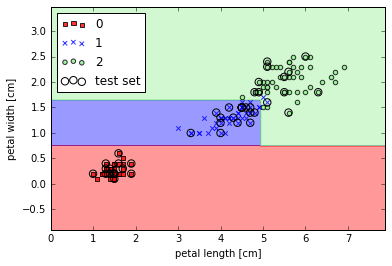

In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

## Combining weak to strong learners via random forests
Random forests can be considered as an esnemble of decision trees. The idea is to combine weak learners to build a more robust model, a strong learner, that has a better generalization error. The algorithm can be summarized as:
1. Draw a random bootstrap sample of size n (randomly choosen with replacement)
2. Grow a decision tree from the bootstrap sample. At each node:
    1. Randomly select $d$ features without replacement
    2. Split the node using the feature that provides the best split according to the objective function
3. Repeat steps 1 to 2 $k$ times
4. Aggregate the prediction by each tree to assign the class label by majority vote.

Although random forests don't offer the same level of interpretability as decision trees, their big advanatage is that we don't have to worry about hyperparameter values very much. We typically only need to care about the number of trees, typically the larger the value the better the performance (at the cost of computational cost).

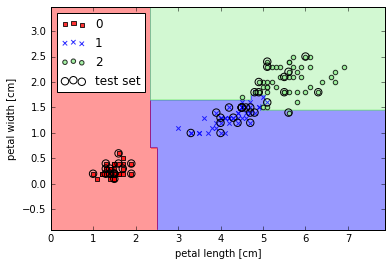

In [19]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

## K-nearest neighbors - a lazy learning algorithm
KNN is called a lazy learner because it doesn't learn a discriminative function from the training data but memorizes the training data instead. It can be summarized as:
1. Choose the number of $k$ and a distance metric
2. Find the $k$ nearest neighbors of the sample that we want to classify
3. Assign the class label by majority vote
This type of classifier immediately adapts as we collect new training data. The downside, is that the computational complexitiy grows linearly with the number of samples in the training set.

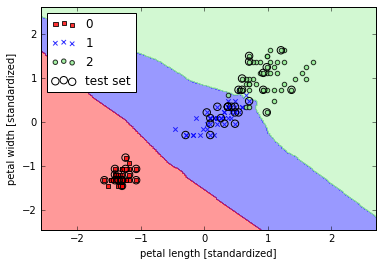

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# CH4: Building Good Training Sets - Data Preprocessing
Often we receive data with missing values (NaN), and need a strategy for dealing with them. One way is to drop any features or rows that contain any NaNs. However, this runs the risk of lossing valuable information.

Another approach is to use interpolation to fill in the missing data. A common approach for this is mean imputation in which missing data is replaced with the mean value of the entire feature column.

The scikit-learn estimator API splits tasks into fit, transform, and predict methods.

When need to be able to handle categorical data that is nominal and ordinal. Ordinal features can be understood as categorical values that can be sorted or ordered (eg. T-shirt sizes, XL > L > M). In contrast, nominal features don't imply any order (eg. T-shirt colours).

Need to be careful with nominal features that when converting the class labels to integers we don't imply an ordering (eg. when converting colours to integers we may give red=1, blue=2, and green=3 which implies that blue > red which doesn't make sense). We can workaround this problem using one-hot encoding. This creatures a new dummy binary feature for each unique value in the nominal feature column (eg. new features of 'isred', 'isblue', and 'isgreen'). Pandas can do this automatically for any string columns using $get_dummies$.

Partitioning data into training and test sets can be done via scikit-learns train_test_split function.

Feature scaling is important for many algorithms. Two common techniques are normalization and standardization.

One way to combat overfitting is to use regularization. We have used L2 regularization in the past, but another approach is L1:

$$L1: \|\mathbf{w}_1\| = \sum_{j=1}^m|w_j|$$

L1 regularization yields sparse feature vectors (most feature weights will be zero).

Feature selection can also be used to reduce model complexity and reduce overfitting. Sequential Backward Selection (SBS) achieves this by iteratively removing features one at a time based on an objective criteria. This criteria can simply be the difference in performance between the classifier before and after the feature removal.

# Compressing Data via Dimensionality Reduction
In the previous chapter we talked about feature selection, here we will explore feature extraction. Feature extraction helps improve computational efficiency but also to combat the curse of dimensionality.

## Principal component analysis
Principal component analysis (PCA) aims to find the directions of maximum variance in high-dimensional data and project it onta a new subspace of equal or fewer dimensions. The orthogonal axes (principal components) of the new subspace can be interpreted as the directions of maximum variance. Note that PCA is highly sensitive to data scaling and we need to standardize the features prior to PCA.

1. Standardize the $d$-dimensional dataset
2. Construct the covariance matrix
3. Decompose the covariance amtrix into its eigenvectors and eigenvalues
4. Select $k$ eigenvectors that correspond to the $k$ largest eigenvalues, where $k$ is the dimensionality of the new feature subspace
5. Construct a projection matrix $\mathbf{W}$ from the 'top' $k$ eigenvectors
6. Transform the $d$-dimensional input dataset $\mathbf{X}$ using the projection matrix $\mathbf{W}$ to obtain the new $k$-dimensional feature subspace

Keep in mind that PCA is an unsupervised technique that doesn't use class labels.

## Linear Discriminant Analysis
Linear Discriminant Analysis (LDA) is a supervised technique for data compression. LDA is very similar to PCA, whereas PCA attempts to find the orthogonal component axes of maximum variance, the goal of LDA is to find the feature subspace that optimizes class separability. LDA assumes the data is normally distributed, the classes have identical covariance matrices, and the features are statistically independent. However, if one of these are slightly violated LDA can still work reasonable well

1. Standardize the $d$-dimensional dataset
2. For each class, comput the $d$-dimensional mean vector
3. Construct the between-class scatter matrix $\mathbf{S}_B$ and the within-class scatter matrix $\mathbf{S}_W$
4. Compute the eigenvectors and corresponding eigenvalues of the matrix $\mathbf{S}_w^{-1}\mathbf{S}_B$
5. Choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues to construct a $d\times k$-dimensional transformation matrix $\mathbf{W}$; the eigenvectors are the columns of this matrix
6. Project the samples on the new feature subspace using the transformation matrix $\mathbf{W}$

## Kernel Principal Component Analysis for Nonlinear Mappings
PCA and LDA both falter when dealing with nonlinear problems. Here we will look at a technique at kernel PCA that maps nonlinear data onto a new, lower-dimensional subspace that is suitable for linear classifiers. 

As we previously discussed with kernel-SVMs, we can tackle nonlinear problems by projecting them onto a new feature space of higher dimensionality where the classes become linearly separable. In kernel PCA, we perform a nonlinear mapping onto a higher-dimensional space and then project the data back onto a lower-dimensional space using standard PCA. One downside to this is that it can be computational very expensive, and this is where we use the kernel trick. By using a kernel we can skip avoid operating in the higher dimensional space and instead directly transform our data to lower-dimensional space. Using this trick we do not get the transformation matrix, so for new data we need to re-use the original training set.

# Best Practices for Hyperparameter tuning
On of the key steps in building a machine learning model is estimating its performance on data that it has not seen before.

## Holdout cross-validation
As we tune model parameters, we need to be careful to not keep reusing the training data as this can lead towards a bias to the test set and overfitting. A preferred method is to split our data into three sections; training set, validation set, and test set. The trainin set is used to train the model, and the validation set is used to evaluate our model for parameter tuning. The test set then proides a less biased estimate of the models ability to generalize on new data.

## K-fold cross-validation
First we randomly split the training dataset into k folds without replacement, where k-1 folds are used for model training and one fold is used for testing. This procedure is repeated k times so that we obtain k models and performance estimate. We can the calculate an average performance to obtain an estimate that is less sensitive to the subpartitioning of the training data compared to the holdout method. Typically we use k-fold cross-validation to for hyperparameter tuning. Once we are satisfied, we can retrain the model on the complete training set and obtain a final performance estimate using the independent test set.

A slight improvement over standard k-fold cross-validation is stratified k-fold cross-validation. In this technique we preserve the class proportions in each fold. This reduces variance in training sets with unequal class proportions.

## Diagnosing bias and variance problems with learning curves
Models with low accuracy in both the training and test set may suffer from high bias. High bias can be addressed by increasing the number of parameters, or by decreasing the degree of regularization. A model with high training accuracy but low test accuracy may suffer from high variance. This can be addressed by collecting more data, reducing the complexity of the model, or increasing the degree of regularization.

In [21]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
                header=None)

In [22]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

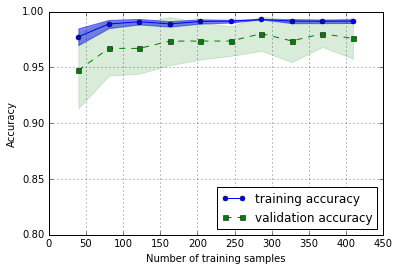

In [24]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.learning_curve import learning_curve

pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(penalty='l2', random_state=0))])
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr, X=X_train, y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.5, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

Based on the high training accuracy and lower validation accuracy, our model may be slightly overfitting the data.

## Validation Curves
Validation curves are very similar to learning curves except we vary the parameters of the model instead of the training size.

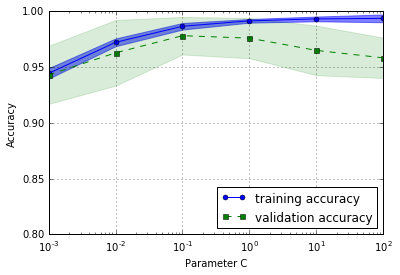

In [25]:
from sklearn.learning_curve import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr,
                                            X=X_train, y=y_train, param_name='clf__C',
                                            param_range=param_range, cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.5, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

## Fine-tuning machine learning models via grid search
The approach of grid search is quite simple, it's a brute-force exhaustive search paradigm where we specify a list of values for different hyperparameters, and the computer evaluates the model performance for each combination of those to optain the optimal set.

In nested cross-validation we have an outer k-fold cross-validation loop to split the data into training and test folds, and an inner loop is used to select the model using k-fold cross-validation on the training fold. After model selection the test fold is then used to evaluate the model performance. 

## Reading a confusion matrix

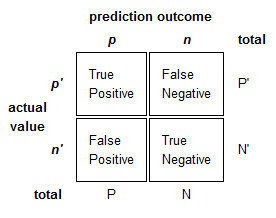

In [26]:
Image('ConfusionMatrix.png')

$$Error = \frac{FP + FN}{FP + FN + TP + TN}$$
$$Accuracy = \frac{TP + TN}{FP + FN + TP + TN} = 1 - Error$$

Precision and recall are related to the true positive and true negative rates which are especially useful for imbalanced class problems.

$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{FN + TP}$$

The F1-score is used as a combination of these.

$$F1 = 2\frac{PRE\times REC}{PRE + REC}$$

## Plotting a receiver operating characteristic
ROC graphs are useful for selecting models for classification based on their performance with respoect to the false positive and true positive rates, which are computed by shifting the decision threshold of the classifier. The diagonal of the ROC can be interpreted as random guessing, and classification models that fall below the diagonal are considered as worse than random guessing. A perfect classifier would fall into the top-left corner with a true positive rate of 1 and a false positive rate of 0. We can then compute the area under the curve (AUC) to characterize the performance.

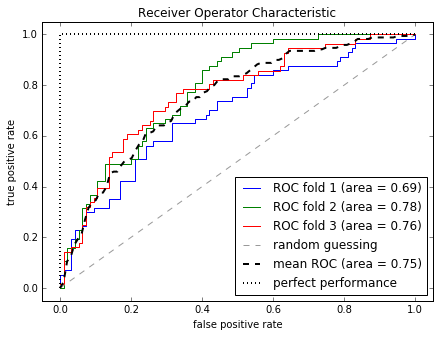

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from scipy import interp
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2', random_state=0, C=100.0))])
X_train2 = X_train[:, [4, 14]]
cv = StratifiedKFold(y_train, n_folds=3, random_state=1)
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train], y_train[train]).predict_proba(X_train2[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0,1], [0,1], linestyle='--', color=(0.6, 0.6, 0.6), label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--', label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1], [0, 1, 1], lw=2, linestyle=':', color='black', label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc='lower right')
plt.show()

## Scoring for multiclass classification
The methods discussed in this section have been specific for binary classification systems. We can extend this to One vs. All classification using macro and micro averaging methods. The micro-average is calculated form the individual true positives, true negatives, false positives, and false negatives of the system. Micro averaging weighs each instance or prediction equally, wheras macro averaging weights all classes equally.

$$ PRE_{micro}=\frac{TP_1+\cdots + TP_k}{TP_1+\cdots + TP_k + FP_1 + \cdots + FP_k}$$
$$ PRE_{macro}=\frac{PRE_1 + \cdots + PRE_k}{k}$$

# Combining Different Models for Ensemble Learning
The goal of ensemble learning is to combine different classifiers into a meta-classifier that has a better generalization performance than each individual classifier alone. In this chapter we will focus on majority voting in which the class label that has been selected by the majority of classifiers. In multi-class settings this is called plurality voting.

Using the training set, we start by training $m$ classifiers. These may be different models or the same model trained with different subsets of the training data. We can illustrate why ensemble methods can work better than individual classifiers alone by applying some simple combinatorics. Assuming that all $n$ binary classifiers have an equal error rate $\epsilon$, are independent, and the error rates are not correlated. The error probability of an ensemble of base classifiers is given as a probability mass function of a binomial distribution.

$$P(y\geq k) = \sum_n^k \left<\frac{n}{k}\right> \epsilon^k(1-\epsilon)^{n-k} = \epsilon_{ensemble}$$

For 11 classifiers with an error rate of 0.25, this gives an ensemble error of 0.034.

In [28]:
from scipy.misc import comb
import math
def ensemble_error(n_classifier, error):
    k_start = math.ceil(n_classifier / 2.0)
    probs = [comb(n_classifier, k) * error**k * (1-error)**(n_classifier - k)
            for k in range(k_start, n_classifier + 1)]
    return sum(probs)
ensemble_error(n_classifier=11, error=0.25)

0.034327507019042969

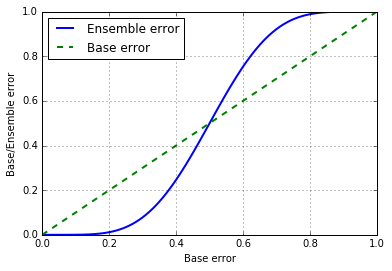

In [29]:
error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error) for error in error_range]
plt.plot(error_range, ens_errors, label='Ensemble error', lw=2)
plt.plot(error_range, error_range, linestyle='--', label='Base error', linewidth=2)
plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error')
plt.legend(loc='upper left')
plt.grid()
plt.show()

We can see that the error of the ensemble is always better than an individual base classifier as along as the base classifiers perform better than random guessing.

We combine multiple classifiers using a weighted average with the probability of a predicted class label as the weights.

$$\hat{y} = arg\: max_i\sum_{j=1}^m w_jp_{ji}$$

Where $p_{ji}$ is the predicted probability of the $jth$ classifier for the class label $i$.

In [30]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np
import operator

class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
        Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'}
        Default: 'classlabel'
        If 'classlabel' the prediction is based on
        the argmax of class labels. Else if
        'probability', the argmax of the sum of 
        probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers]
        Optional, default: None
        If a list of 'int' or 'float' values are
        provided, the classifiers are weighted by
        importance; Uses uniform weights if 'weights=None'

    """

    def __init__(self, classifiers, vote='classlabel', weights=None):
        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, 
            shape = [n_samples, n_features]
            Matrix of training samples.

        y : array-like, shape = [n_samples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        # Use LabelEncoder to ensure class labels start
        # with 0, which is important for np.argmax
        # call in self.predict
        self.labelenc_ = LabelEncoder()
        self.labelenc_.fit(y)
        self.classes_ = self.labelenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.labelenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix},
            Shape = [n_samples, n_features]
            Matrix of training samples.

        Returns
        -------
        maj_vote : array-like, shape = n_samples
            Predicted class labels.

        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else: # 'classlabel' vote
            # Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X) for clf in self.classifiers_]).T
            maj_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x, self.weights)),
                                                                axis=1, arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote
    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix},
            shape = [n_samples, n_features]
            Training vectors, where n_samples is
            the number of samples and 
            n_features is the number of features.

        Returns
        -------
        avg_proba : array-like
            shape = [n_samples, n_classes]
            Weighted average probability for 
            each class per sample.

        """
        probas = np.asarray([clf.predict_proba(X)
                            for clf in self.classifiers_])
        avg_proba = np.average(probas,
                                axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, 
                self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                out['%s__%s' % (name, key)] = value
            return out

In [31]:
iris = datasets.load_iris()
X, y = iris.data[50:, [1,2]], iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
clf1 = LogisticRegression(penalty='l2', C=0.001, random_state=0)
clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', clf3]])
clf_labels = ['Logistic Regression', 'Decision Tree', 'KNN']
print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print("ROC AUC %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])
clf_labels += ['Majority Voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC 0.92 (+/- 0.20) [Logistic Regression]
ROC AUC 0.92 (+/- 0.15) [Decision Tree]
ROC AUC 0.93 (+/- 0.10) [KNN]
Accuracy: 0.92 (+/- 0.20) [Logistic Regression]
Accuracy: 0.92 (+/- 0.15) [Decision Tree]
Accuracy: 0.93 (+/- 0.10) [KNN]
Accuracy: 0.97 (+/- 0.10) [Majority Voting]


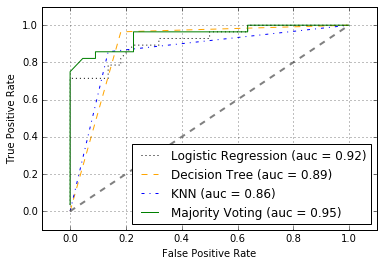

In [32]:
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Bagging - building an ensemble of classifiers from bootstrap samples
Bagging is an ensemble technique closely related to the previous example except instead of using the same training set to fit the individual classifiers, we draw boostrap samples (random samples with replacement) from the initial training set for each classifier. This can help to improve accuracy of unstable models and decrease the degree of overfitting. Often used with an unpruned decision tree. Bagging is ineffective in reducing model bias, which is why we want to choose an ensemble of classifiers with low bias (like unpruned decision trees).

## Leveraging weak learners via adaptive boosting.
In adaptive boosting we use an ensemble of weak learners that have only a slight performance advantage over random guessing (such as a decision tree stump). They key concept is to focus on samples that are hard to classify by letting the weak learners subsequently learn from misclassified training samples to improve the performance of the ensemble. 
1. Draw a random subset of training samples $d_1$ without replacement from the training set $D$ to train a weak learner $C_1$
2. Draw second random training subset $d_2$ without replacement from the training set and add 50 percent of the samples that were previously misclassified to train a weak learner $C_2$
3. Find the training samples $d_3$ in the training set $D$ on which $C_1$ and $C_2$ disagree to train a third weak learner $C_3$
4. Combine the weak learners $C_1$, $C_2$, and $C_3$ via majority voting

A closing remark about ensemble learners is that they increase the computational complexity for an often modest performance increase.

# Applying Machine Learning to Sentiment Analysis
Look at a subfield of natural language processing called sentiment analysis. 

The bag of words model is:
1. We create a vocabulary of unique tokens - for example, words - from the entire set of documents
2. We construct a feature vector from each document that contains the counts of how often each word occurs in the particular document

Since the unique words in each document only represent a small subset of all the words in the bag-of-words vocabulary, the feature vectors will consist of mostly zeros, which is why we call them sparse.

When analyzing text we often encounter words that occur across multiple documents form both classes. These frequently occuring words typically don't contain useful or discriminatory information. We can use term frequency-inverse document frequency to downweight these words in our feature vectors.
$$tf\!-\!idf(t,d) = tf(t,d) \times idf(t,d)$$
$$idf(t,d)=log\frac{n_d}{1+df(d,t)}$$

Where $n_d$ is the total number of documents and $df(d,t)$ is the number of documents $d$ that contain the term $t$. Note that adding the constant 1 to the denominator is optional and serves the purpose of assigning a non-zero value to terms that occur in all training samples; the log is used to ensure that low document frequenciers are not given too much weight.

# Embedding a Machine Learning Model into a Web Application

# Predicting Continuous Target Variables with Regression Analysis

## Introducing a simple linear regression
Multivariate linear regression is expressed as:

$$y = w_0x_0 + w_1x_1 + \cdots + w_mx_m=\sum_{i=0}^mw_ix_u = \mathbf{w}^T\mathbf{x}$$

Where $w_0$ is the y axis intercept with $x_0=0$.

Let's now look at a housing data set.

In [33]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
             header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Exploratory data analysis is an important first step prior to the training of a machine learning model.

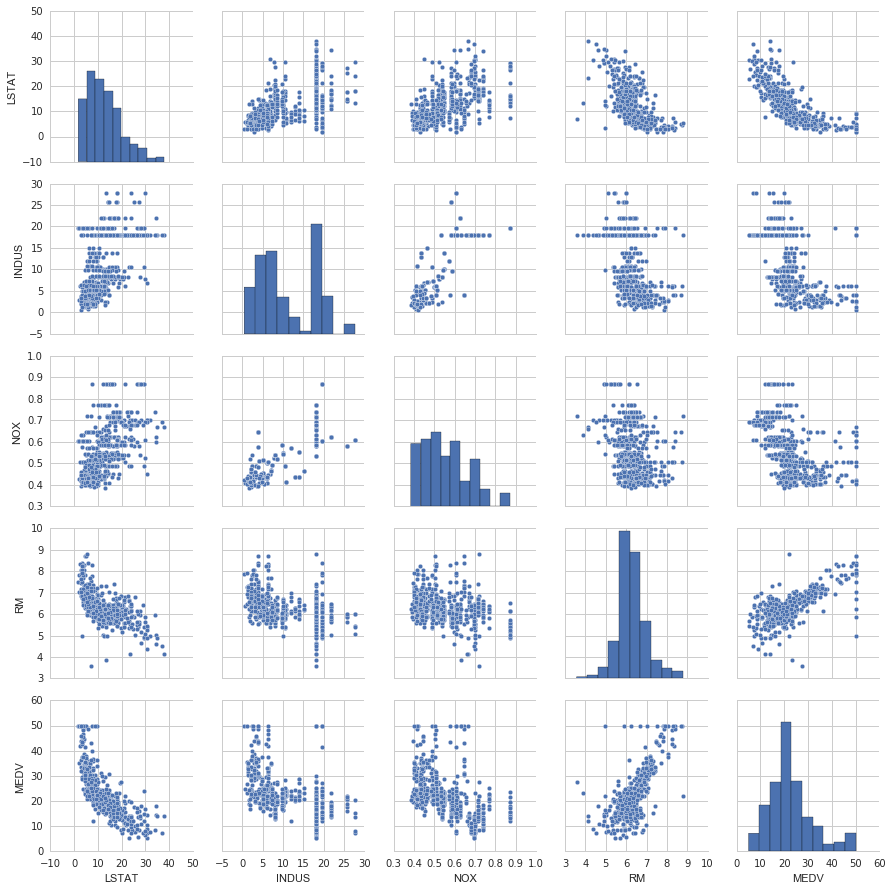

In [34]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.show()

We will now create a correlation matrix, which is closely related to the covariance matrix used in PCA (can interpret it as a rescaled version of the covariance matrix). Correlation matrix is identical to a covariance matrix computed from standardized data.

Correlation matrix is made of the Pearson product-moment correlation coefficients, which measure the linear dependence between pairs of features. They are bounded to the range -1 to 1. Two features have a perfect positive correlation if $r=1$, no correlation is $r=0$, and a perfect negative correlation if $r=-1$. It is calculated as the covariance between two features $x$ and $y$ divided by the product of their standard deviations.

$$ r = \frac{\sum_{i=1}^n[(x^{(i)} - \mu_x)(y^{(i)}-\mu_y)]}{\sqrt{\sum_{i=1}^n(x^{(i)} - \mu_x)^2} \sqrt{\sum_{i=1}^n(y^{(i)} - \mu_y)^2}} = \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$

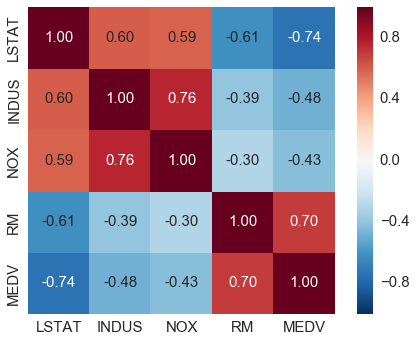

In [35]:
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15},
                yticklabels=cols, xticklabels=cols)
plt.show()
sns.reset_orig()
%matplotlib inline 

In the Adaline artificial neuron we used a linear activation function and defined a cost function which we minimized with gradient descent and stochastic gradient descent. The cost function in Adaline is the sum of squares which is identical to the ordinary least squares cost function.

$$J(w) = \frac{1}{2}\sum_{i=1}^n(y^{(i)}-\hat{y}^{(i)})^2$$

Where $\hat{y}$ is the predicted output $\hat{y}=\mathbf{w}^T\mathbf{x}$. Essentials OLS linear regression can be understood as Adaline without the unit step function.

## Fitting a robust regression model using RANSAC
Linear regression models can be heavily impacted by the present of outliers. There are many statistical test for throwing out outliers, but as an alternative we willlook at Random Sample Consensus (RANSAC), which fits a regression model to a subset of the data, the so-called inliers.
1. Select a random number of samples to be inliers and fit the model
2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers.
3. Refit the model using all inliers
4. Estimate the error of the fitted model versus the inliers
5. Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations has been reached; go back to step 1 otherwise.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


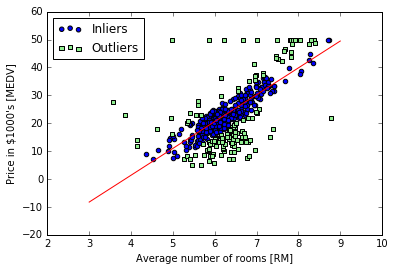

In [36]:
X = df[['RM']].values
y = df[['MEDV']].values
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
ransac = RANSACRegressor(LinearRegression(), max_trials=100, min_samples=50,
                        residual_metric=lambda x: np.sum(np.abs(x), axis=1),
                        residual_threshold=5.0, random_state=0)
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

## Evaluating the performance of linear regression models
We will now use all features in the dataset and split it into test and training data.

In [37]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

Since the data now uses multiple explanatory variable we can't visualize it in a two-dimensional plot. However, we can make a residual plot.

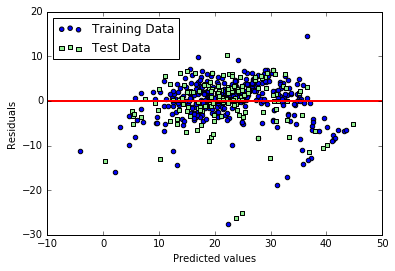

In [38]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test Data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

A perfect prediction would leave the residuals at exactly zero (which we will never see in practice). However, a good model will have randomly distributed residuals around the centerline.

Another useful measure of a model's performance is the Mean Squared Error (MSE).

$$MSE = \frac{1}{n}\sum_{i=1}^n(y^{(i)}-\hat{y}^{(i)})^2$$

## Using regularized methods for regression
Ridge regression is an L2 model where we simply add the squared sum of the weights to our least-squares cost function:

$$J(w)_{ridge} = \sum_{i=1}^n(y^{(i)}-\hat{y}^{(i)})^2 + \lambda\|w\|^2_2$$
$$L2: \lambda\|w\|^2_2=\lambda\sum_{j=1}^mw_j^2$$

With the note that we don't regularize the intercept $w_0$.

An alternative method that can lead to sparse models is the Least Absolute Shrinkage and Selection Operator (LASSO), which performs both regularization and feature selection. 

$$J(w)_{LASSO} = \sum_{i=1}^n(y^{(i)}-\hat{y}^{(i)})^2 + \lambda\|w\|_1$$
$$L1: \lambda\|w\|_1=\lambda\sum_{j=1}^m|w_j|$$

A limitation to LASSO is that it selects at most $n$ variables if $m>n$. A compromise between the previous two methods is the Elatic Net hihc has a L1 penalty to generate sparsity and a L2 penalty to overcome some of the limitations of LASSO, such as the number of selected variables.

$$J(w)_{ElasticNet} = \sum_{i=1}^n(y^{(i)}-\hat{y}^{(i)})^2 + \lambda_1\sum_{j=1}^mw_j^2 + \lambda_2\sum_{j=1}^m|w_j|$$

## Turning a linear regression model into a curve - polynomial regression.
In the previous sections we assumed a linear relationship between explanatory and response variables. Here we will account for the violation of linearity assumption by adding polynomial terms.

## Dealing with nonlinear relationships using random forests
Decision tree regression can be understood as the sum of piecewise linear functions. In other words, we are subdividing the input space into smallers regions that become more manageable.

For regression we replace the information gain $IG(D_p,x)$ with the $I(t)=MSE(t)$ (mean squared error).

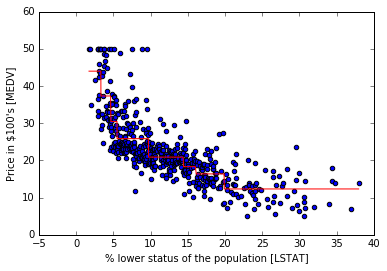

In [39]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df[['MEDV']].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
plt.scatter(X[sort_idx], y[sort_idx], c='blue')
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), c='red')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $100\'s [MEDV]')
plt.show()

The random forest alogrithm is an ensemble technique that combines multiple decision trees. It tends to have a better generalization performance due to randomness that helps to decrease model variance. The version of this algorithm for regression is almost identical as in classification except we grow the individual decision trees using the MSE criterion and the predicted value is calculated as the average prediction over all decision trees.

# Working with Unlabeled Data - Clustering Analysis
## Grouping by similarity using k-means
k-means is a type of prototype-based clustering. This means that each cluster is represented by a prototype, which can either be the centroid (average) of similar points with continuous features, or the mediod (most frequently occuring point) in the case of categorical features. While k-means is very good at identifying clusters of spherical shapes, one of its drawbacks is that we have to specify the number of clusters k.

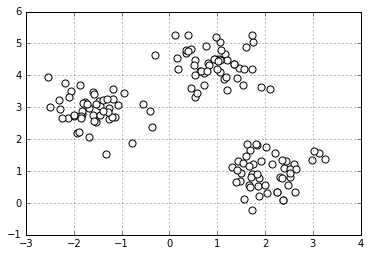

In [40]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)
plt.scatter(X[:,0], X[:,1], c='white', marker='o', s=50)
plt.grid()
plt.show()

K-means algorith can be summarized by four steps:
1. Randomly pick $k$ centroids from the samples points as initial cluster centers
2. Assign each sample to the nearest centroid
3. Move the centroids to the center of the sampes that were assigned to it
4. Repeat the steps 2 and 3 until the cluster assignment does not change or a user-defined tolerance or a maximum number of iterations is reached

The next question is then, how do we measure similarity between objects? A common way is to describe it as the opposite of distance and a commonly used distance measure is the squared Euclidean distance. With this measure, k-means then becomes a simple optimization problem for minimizing the within-cluster sum of squared errors, which is often called cluster inertia.

So far we have discussed the classic k-means algorithm that uses a random seed to place the initial centroids, which can sometimes result in bad clustering or slow convergence if the initial centroids are chosen poorly. One way to address this is to run the algorithm multiple times and choose the best performing model in terms of the SSE. Another strategy is to place the initial centroids far away from each other via the k-means++ algorithm.

Initialization in k-means++ can be summarized as:
1. Initialize an empty set $\mathbf{M}$ to store the k centroids being selected.
2. Randomly choose the first centroid $\mathbf{\mu}^{(j)}$ from the input samples to assign to $\mathbf{M}$
3. For each sample $\mathbf{x}^{(i)}$ that is not in $\mathbf{M}$, find the minimum squared distance $d(\mathbf{x}^{(i)}, \mathbf{M})^2$ to any of the centroids in $\mathbf{M}$
4. To randomly select the next centroid $\mathbf{\mu}^{(p)}$, use a weighted probability distribution equal to $\frac{d(\mathbf{\mu}^{(p)}, \mathbf{M})^2}{\sum_id(\mathbf{x}^{(i)}, \mathbf{M})^2}$
5. Repeat steps 2 and 3 until $k$ centroids are chosen.
6. Proceed with the classic k-means algorithm

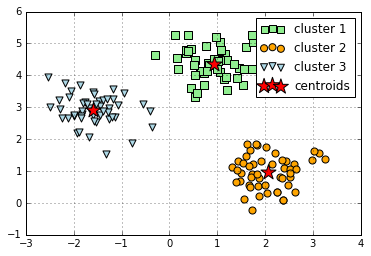

In [41]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km==0, 0], X[y_km==0, 1], s=50, c='lightgreen', marker='s', label='cluster 1')
plt.scatter(X[y_km==1, 0], X[y_km==1, 1], s=50, c='orange', marker='o', label='cluster 2')
plt.scatter(X[y_km==2, 0], X[y_km==2, 1], s=50, c='lightblue', marker='v', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, c='red', marker='*', label='centroids')
plt.legend()
plt.grid()
plt.show()

One of the drawbacks of k-means is that we have to specify the number of clusters $k$ a priori, which can be difficult, especially if we are working with higher dimensional data. Also, k-means clusters do not overlap, and are not hierarchical and we assume that there is at least one item in each cluster.

## Hard versus soft clustering
In hard clustering, such as k-means, each sample is assigned to exactly one cluster. In constrast, algorithms for soft clustering assign a sample to one or more clusters, such as fuzzy C-means (FCM). FCM is very similar to k-means except we replace the hard cluster assignment for each point by probabilites that each point belongs to each cluster. This can be summarized as:
1. Specify the number of k centroids and randomly assign the cluster memberships for each point.
2. Compute the cluster centroids
3. Update the cluster memberships for each point
4. Repeat steps 2 and 3 until the membership coefficients do not change or a user-defined tolerance or a maximum number of iterations is reached

## Using the elbow method to find the optimal number of clusters
One of the main challenges with unsupervised learning is that we don't know th definitive answer. We need to use intrinsic metrics, suchas the the within-cluster SSE (distortion), to compare the performance of different k-means clusterings. Based on the distortion, we can use a graphical method, the elbow method, to estimate the optimal number of clusters $k$ for a given task. Logically, as we increase the number of clusters the distortion will decrease. What we want to find is the point where the change in distortion grows smaller.

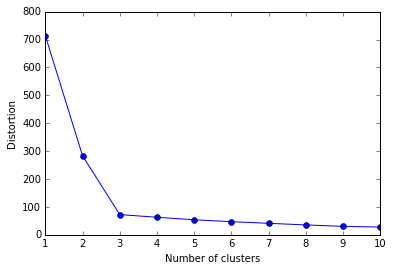

In [42]:
distortion = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortion.append(km.inertia_)
plt.plot(range(1,11), distortion, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

As we can see in this graph, the elbow is located at $k=3$

## Quantifying the quality of clustering via silhouette plots
Another intrinsic quality of clustering metric is silhouette analysis, which can be applied to more algorithms then just k-means. It is a graphical tool to plot a measure of how tightly grouped the samples in the clusters are. The silhouette coefficient of a single sample in our dataset can be found by:
1. Calculate the cluster cohesion $a^{(i)}$ as the average distance between a sample $\mathbf{x}^{(i)}$ and all other points in the same cluster
2. Calculate the cluster separation $b^{(i)}$ from the next closest cluster as the average distance between the sample $\mathbf{x}^{(i)}$ and all samples in the nearest cluster
3. Calculate the silhouette $s^{(i)}$ as the difference between cluster cohesion and separation divided by the greater of the two:
$$ s^{(i)} = \frac{b^{(i)} - a^{(i)}}{max(b^{(i)}, a^{(i)})}$$

A silhouette coefficient of 0 if the cluster separation and cohesion are equal. As we approach the ideal value of 1, $b$ becomes much greater than $a$ which means that clusters are far apart and tightly packed within themselves.

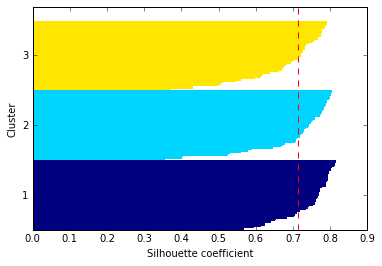

In [43]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

from sklearn.metrics import silhouette_samples
from matplotlib import cm

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

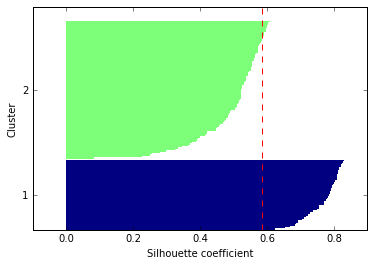

In [44]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

The first plot shows good clustering with all values very close to 1. We reduce the number of clusters in the second plot to show a silhouette plot for a poor clustering (using only two clusters).

## Organizing clusters as a hierarchical tree
An alternative approach to prototype-based clustering is hierarchical clustering. One advantage to this technique is that it allows us to plot dendrograms (visualizations of a binary hierarchical clustering), which can help with the interpretation of the results to produce meaningful taxonomies. We also don't need to specify the number of clusters with this approach.

There are two main approaches to hierarchical clustering: agglomerative and divisive clustering. Divise clustering starts with one cluster encompassing all samples and iteratively splits the cluster into smaller clusters. Agglomerative clustering takes the oppositve approach and starts with each samples as an individual cluster.

For agglomerative clustering, there are two standard algorithms: single linkage and complete linkage. In single linkage we compute the distances between the most similar members for each pair of clusters and merge the two clusters for which this distance is the smallest. In complete linkage, we take the same approach except we compare the most dissimilar points in each pair of clusters.

For agglomerative clustering:
1. Compute the distance matrix of all samples
2. Represent each data point as a singleton cluster
3. Merge the two closest clusters based on the distance of the most dissimilar (distant) members
4. Update the distance matrix
5. Repeat steps 2 to 40 until one single cluster remains

In [45]:
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3]) * 10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [46]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [47]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
            index=['cluster %d' % (i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


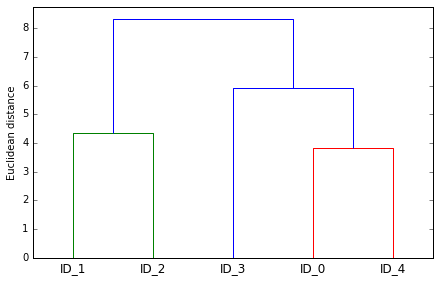

In [48]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

We can attach a heat map to the dendrogram as follows:

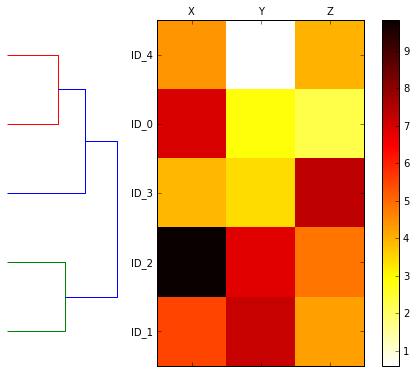

In [49]:
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

row_dendr = dendrogram(row_clusters, orientation='right')
df_rowclust = df.ix[row_dendr['leaves'][::-1]]

axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

## Locating regions of high density via DBSCAN
One more approach is Density-based Spatial Clustering of Applications with Noise. Density in DBSCAN is defined as the number of points within a specified radius $\epsilon$.

In DBSCAN, a specific label is attached to each sample using the following criteria:
- A core point if at least a specified number (MinPts) of neighboring points fall within the specified radious $\epsilon$
- A border point if it has fewer neighbors than MinPts with $\epsilon$ but lies with the $\epsilon$ radius of a core point
- All other points are noise points

After labelling:
1. Form a separate cluster for each core point or a connected group of core points (if core points are no farther away than $\epsilon$
2. Assign each border point to the cluster of its corresponding core point

One of the main advantages of DBSCAN is that it does not assume spherical clusters and is capable of removing noise points.

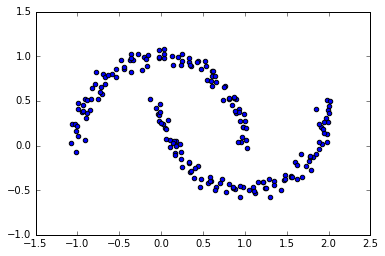

In [50]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

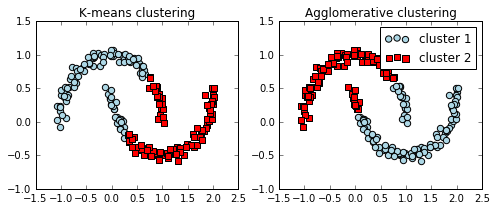

In [51]:
from sklearn.cluster import AgglomerativeClustering
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0, 0], X[y_km==0, 1], c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km==1, 0], X[y_km==1, 1], c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0, 0], X[y_ac==0, 1], c='lightblue', marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac==1, 0], X[y_ac==1, 1], c='red', marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

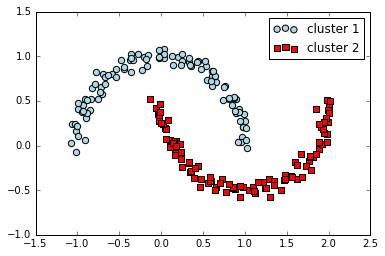

In [52]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0, 0], X[y_db==0, 1], c='lightblue', marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db==1, 0], X[y_db==1, 1], c='red', marker='s', s=40, label='cluster 2')
plt.legend()
plt.show()

# Training Artificial Neural Networks for Image Recognition
Reminder that we used the Adaline algorithm earlier to train a network where the input values were multiplied by weights, summed in a net input function, passed to a linear activation function that was used for gradient descent, and then passed through a unit step function to get a binary output.

We will expand this to a multi-layer neural network. Activating a neural network via forward propagation:
1. Starting at the input layer, we forward propagate the patterns of the training data through the network to generate an output.
2. Based on the network's output, we calculate the error that we want to minimize using a cost function
3. We backpropagate the error, find its derivative with respect to each weight in the network, and update the model.

Finally, after repeating the steps for multiple epochs and learning the weights, we use forward propagation to calculate the network output and apply a threshold function to obtain the predicted class labels in the one-hot representation. 

To be able to solve nonlinear problems, we use a nonlinear activation like the sigmoid activation function. We can think of the neurons in the multi-layer preceptron (MLP) as logistic regression units that return values in the continuous range between 0 and 1.

## Training neural networks via backpropagation
In essence, backpropagation is a very computationally efficient approach to compute the derivatives of a complex cost function. Our goal is to use these derivatives to learn the weight coefficients for parameterizing a multi-layer artificial neural network. The challenge is that we are typically dealing with a very large number of weights in a high dimensional feature space. The cost surface is also not convex or smooth. 

In the context of computer algebra, a set of techniques known as automatic differentiation have been developed for calculated the derivative of nested functions. Automatic differentiation comes into two modes; forward and revers. Backpropagation is simply just a special case of the reverse-mode. The key point is that applying the chain rule in the forward direction can be very expansion as we have to do matrix-matrix multiplication. However, in reverse, we only have to do matrix-vector multiplication which is much cheaper.

Gradient checking is a numerical tool for calculating the derivative of the cost function with respect to the weights. It is very slow but useful for double-checking our backpropagation implementation.

## Convolutional Neural Networks
Key idea behind CNNs is to build many layers of feature detectors to take the spatial arrangement of pixels in an input image into account. In our MLP we unrolled the images into feature vectors and these inputs were fully connected to the hidden layer - ignoring spatial information. IN CNNs, we use receptive fields to connect the input layer to a feature map. The receptive fields are overlapping windows that we slide over the pixels of an input image to create a feature map.

## Recurrent Neural Networks
RNNs can be thought of as a feedforward neural network with feedback loops or backpropagation through time. In RNNs the neurons only fire for a limited amount of time before they are (temporarily) deactivated. In turn, these neurons activaate other neurons that fire at a later point in time. We can think of an RNN as an MLP with an additional time variable.